# theano随机数
这一节将介绍theano的随机数生成器，由于theano的符号运算机制，使用随机数不像Numpy中那样直观，但只要理解了上一节介绍的[共享变量](./part3-shared-variable.ipynb)的概念，就不难理解。使用theano的随机数生成器的代码如下：

In [1]:
%matplotlib inline
from __future__ import print_function
from theano.tensor.shared_randomstreams import RandomStreams
from theano import function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# initialize random stream
rng = np.random.RandomState(1234)
srng = RandomStreams(rng.randint(1234))

Using gpu device 0: GeForce GTX 960M (CNMeM is disabled, cuDNN not available)


`rng`是numpy的随机数生成器，`rng.randint(1234)`从[0,1234)的离散均匀分布随机采样一个整数作为theano随机数生成器的种子。theano的RandomStreams是共享变量，因此在编译与它有关的函数时不需要将它作为参数传入。

## 均匀分布采样
从均匀分布采样1,000,000个点

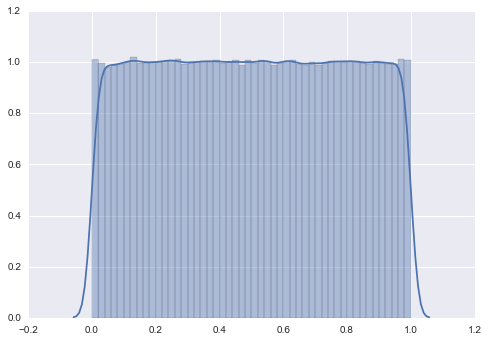

In [2]:
# sample 1,000,000 points from uniform distribution
_uniform = srng.uniform(low=0, high=1, size=(1000000,))
uniform = function([], _uniform)
sns.distplot(uniform())
plt.show()

## 二项式分布采样
模拟投掷硬币10000次，输出p对应的事件发生的次数

In [3]:
# toss a coin 10000 times
p = 0.5
_toss_coin = srng.binomial(n=10000, p=p)
toss_coin = function([], _toss_coin)
print(toss_coin())

5045


## 多项式分布采样
模拟投掷骰子10000次，输出1~6出现的次数

In [4]:
# Throw a dice 10000 times
_roll_dice = srng.multinomial(n=10000, pvals=[1/6.]*6)
roll_dice = function([], _roll_dice)
print(roll_dice())

[1694 1626 1641 1672 1699 1668]


## 高斯分布采样
从标准高斯分布采样10000个点

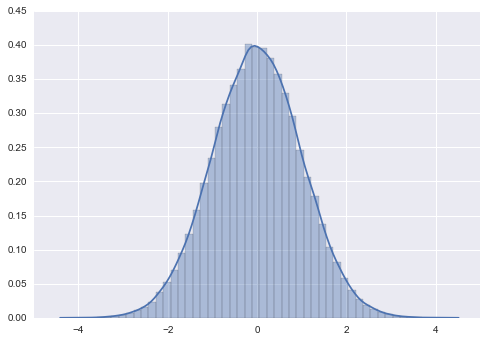

In [5]:
# sample from standard gaussian
_gaussian = srng.normal((100000, ))
gaussian = function([], _gaussian)
sns.distplot(gaussian())
plt.show()

## 泊松分布采样
从泊松分布采样10000个点

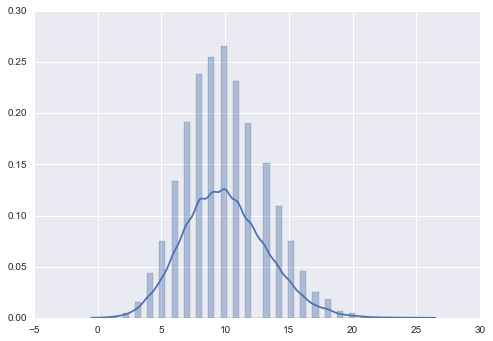

In [6]:
# sample 10000 points from poisson distribution
_poisson = srng.poisson(lam=10, size=(10000, ))
poisson = function([], _poisson)
sns.distplot(poisson())
plt.show()

## 随机排列
生成0~10的随机排列

In [7]:
# generate random permutation
_perm = srng.permutation(n=10)
perm = function([], _perm)
print(perm())

[9 3 4 5 8 7 6 0 1 2]
